#### ***Wine Quality Red***

*Our data set has 1 to 10 values that indicate the quality of red wine.We will be installing a model that estimates the quality of the wine based on the data set changes.*


* *Understanding Data*
* *Cleaning Data*
* *Data Processing*
* *Visualize Data*
* *Standardization Data*
* *Model and Prediction*

*Some of the steps that have been performed on the data set.*

In [88]:
# Pull Data
import pandas as pd

winequality_red =  pd.read_csv("winequality-red.csv")
wqr_df = winequality_red.copy() 

In [50]:
# Data Set
wqr_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Structural Informations
wqr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
# Statistical Values
wqr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


*When we look at the statistical values, we can see that the dependent variable 'quality' is no more bigger than 8 and is no more less 3, while the data set has an average quality level of 5.Let's look at the interval of a few variables in the data set;*

* *3 < quality < 8 (Quality)*
* *2.7 < ph < 4.0 (pH)*
* *8.4 < alcohol < 14.9 (Alcohol)*
* *0.99 density < 1.00 (Density)*



In [5]:
# Degişkenlerin Birbirine Göre Durumları
wqr_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


*We can see how much positive and negative the dependent variable is affected by other variables.*

* *alcohol +0.476166*
* *pH -0.057731*
* *sulhates +0.251397*

*Continues as follows.*

##### ***Veriyi Görselleştirme (Data Visualization)***

*We will be using the Seaborn library, one of the most commonly used libraries to visualize the data.*

In [9]:
# import 
import seaborn as sbn

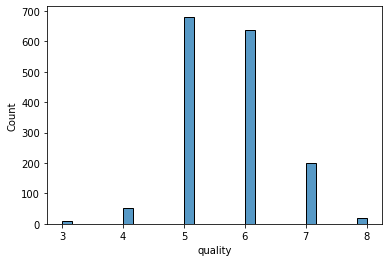

In [14]:
# Histogram - quality
sbn.histplot(wqr_df['quality']);

*We are in the process of analyzing the density of dependent variable classes on the data set.*
* *We see that the data set has a higher quality value of 5, 6*

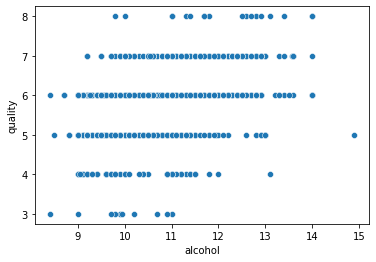

In [15]:
# Scatter Plot
sbn.scatterplot(x = 'alcohol' , y = 'quality' , data=wqr_df);

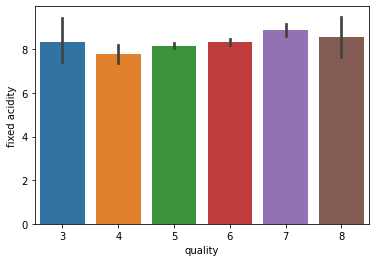

In [35]:
# Barplot [quality - fixed acidity] 
sbn.barplot(x = 'quality' , y = 'fixed acidity' , data=wqr_df);

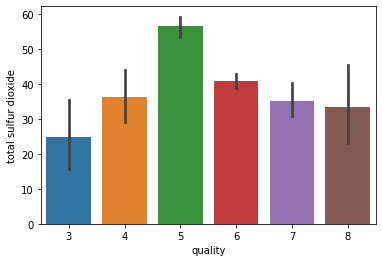

In [36]:
# Barplot [quality -  total sulfur dioxide]
sbn.barplot(x = 'quality' , y = 'total sulfur dioxide' , data=wqr_df);

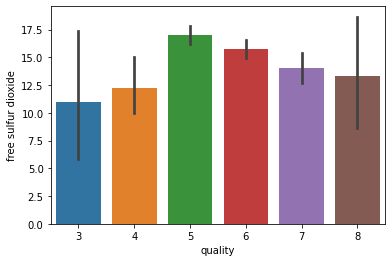

In [37]:
# Barplot [quality - free sulfur dioxide]
sbn.barplot(x = 'quality', y = 'free sulfur dioxide' , data =wqr_df);

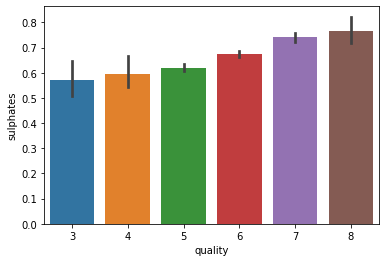

In [40]:
# Barplot [quality - sulphates]
sbn.barplot(x = 'quality' , y = 'sulphates' , data = wqr_df);

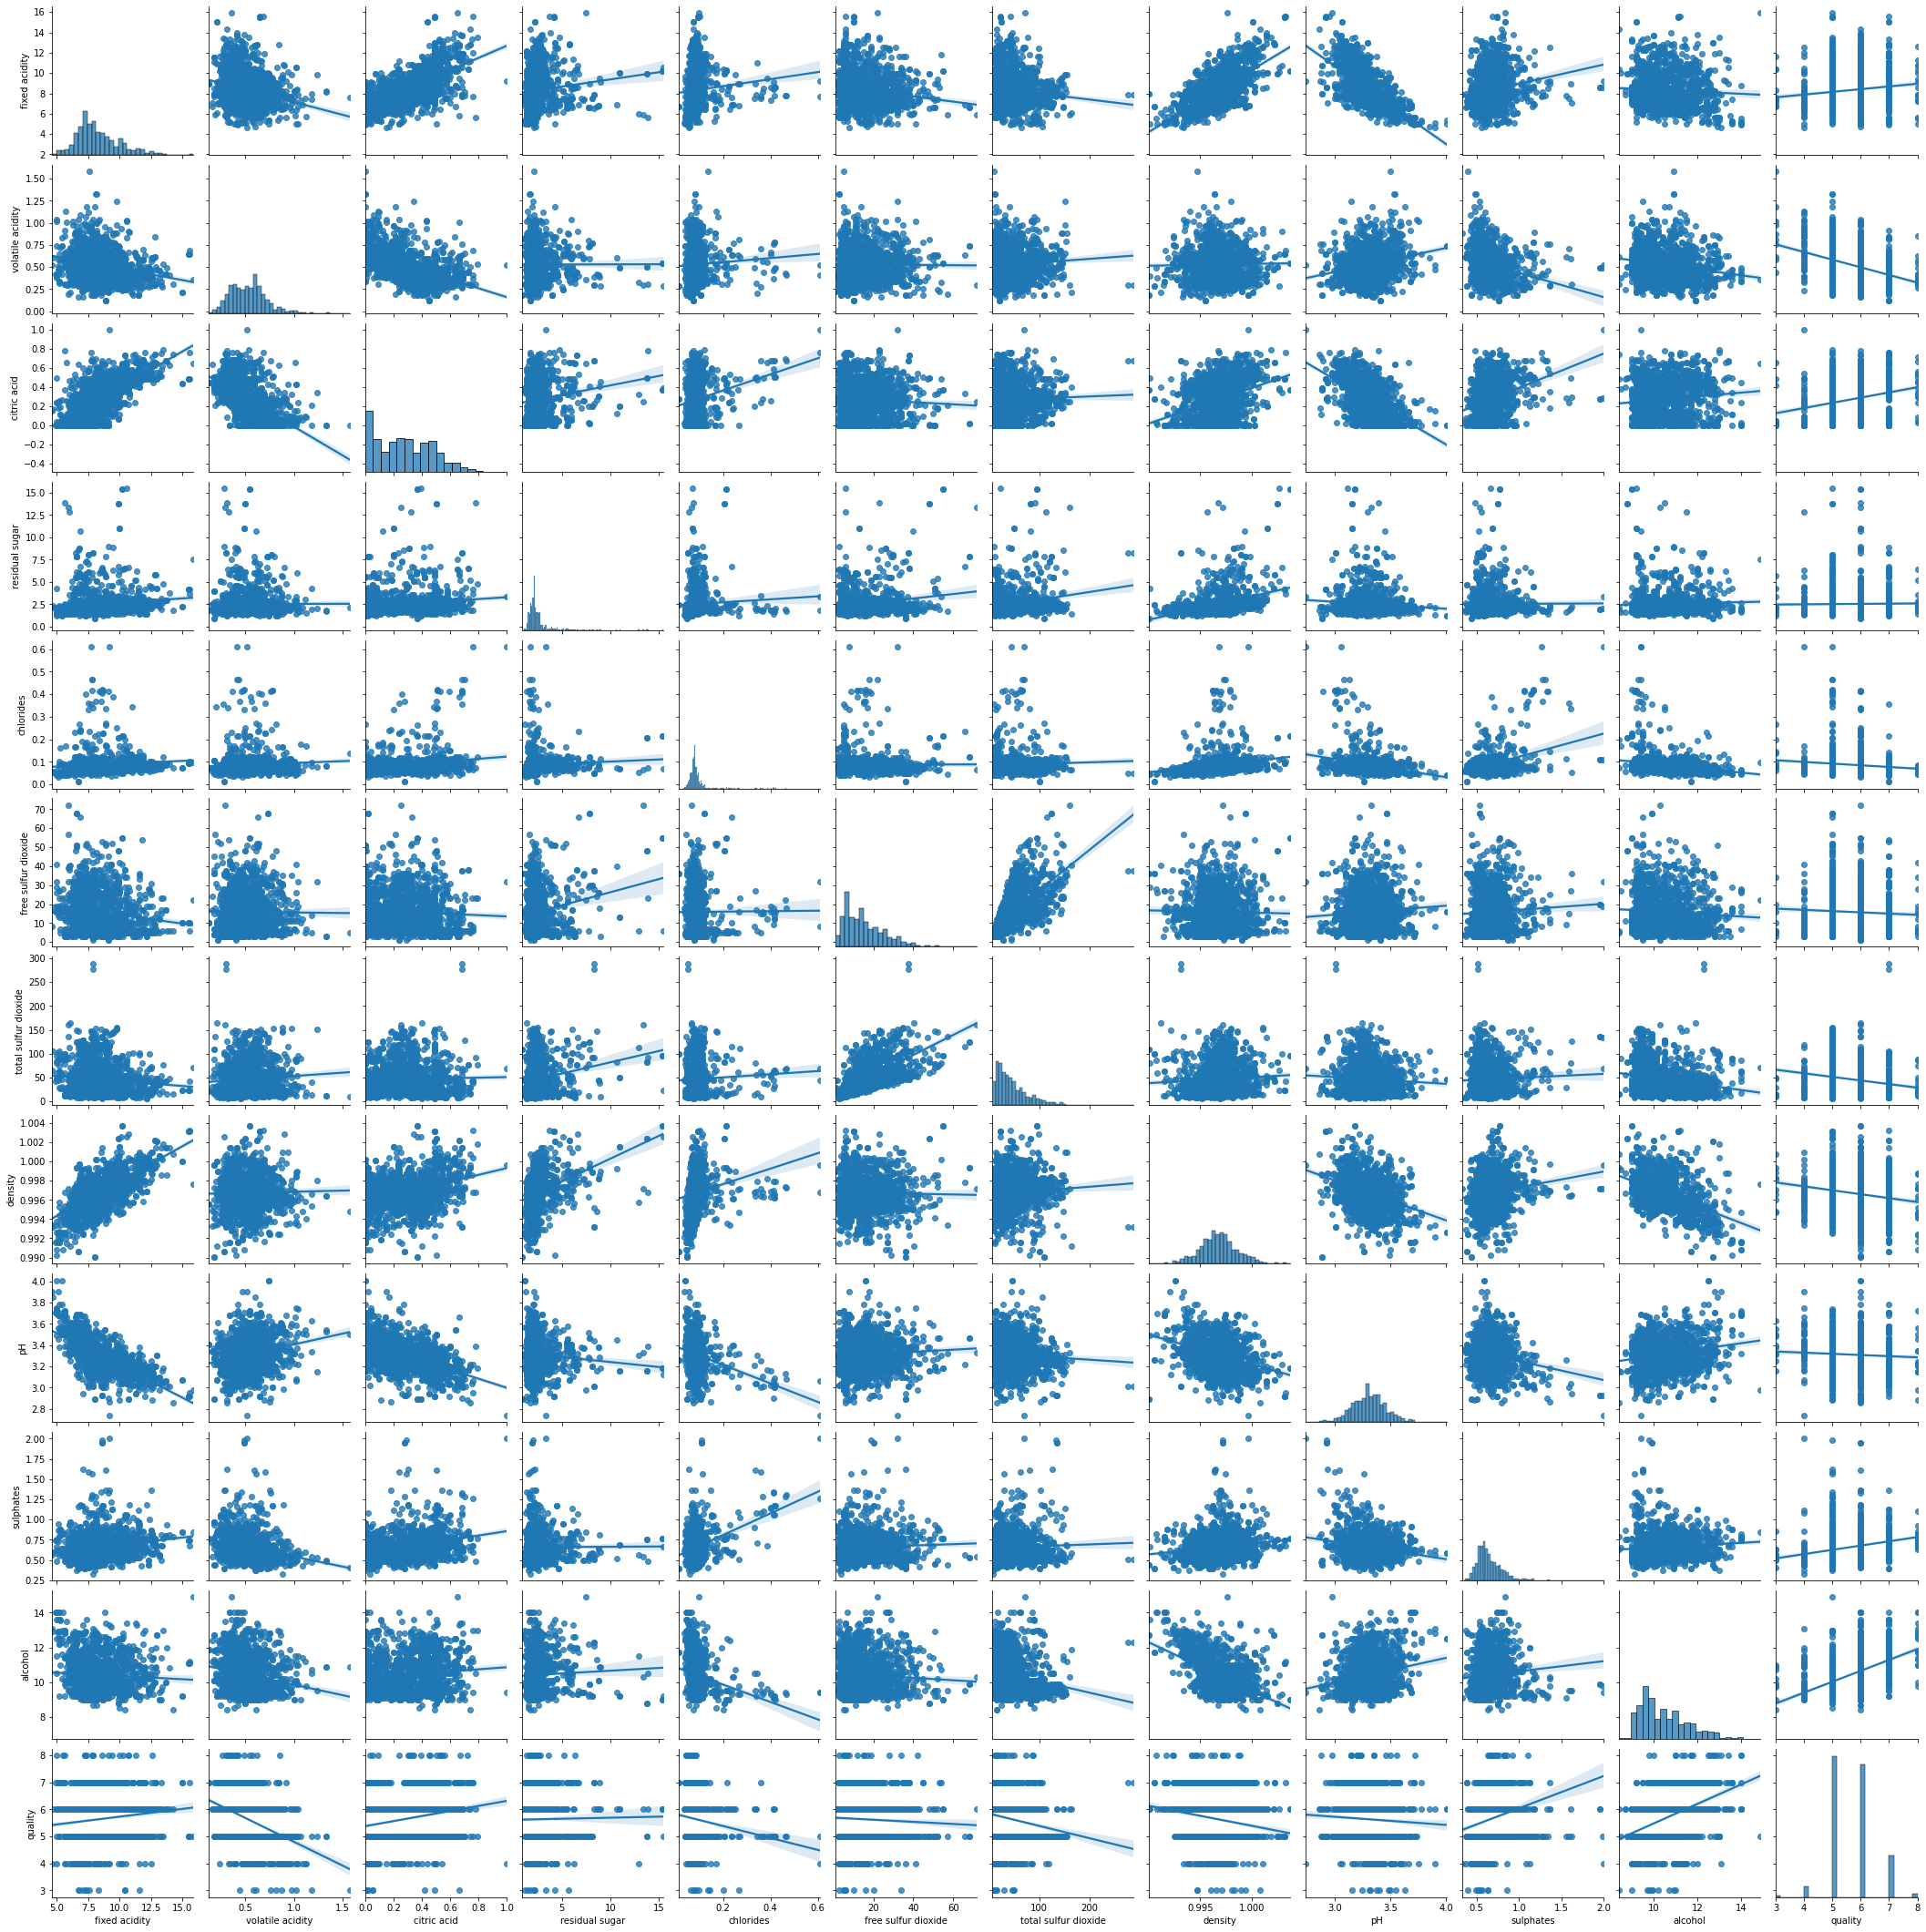

In [20]:
# Pairplot
sbn.pairplot(wqr_df, kind='reg');

##### ***Missing Data***

In [28]:
# Eksik Veri
wqr_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

*As there is no missing data in our data set, we will not be applying the missing data transactions.*

##### ***Operation on Variables***

*Making binary classificaion for the response variable.*
*Dividing wine as* ***good*** *and* ***bad*** *by giving the limit for the quality*

In [90]:
bins = (2, 6.5, 8)
category = ['bad', 'good']
wqr_df['quality'] = pd.cut(wqr_df['quality'], bins = bins, labels = category)

In [98]:
# Quality Classes [ Bad - Good]
wqr_df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

*After we classify it as Bad and Good, we will be able to display these values numerically again.*
* *We are doing with LabelEncoder*

In [95]:
# Sklearn Library
from sklearn.preprocessing import LabelEncoder

In [99]:
# fit_transfrom -- LabelEncoder
wqr_df['quality']  = LabelEncoder().fit_transform(wqr_df['quality'])

In [101]:
# Quality Classes [0 : Bad , 1 : Good]
wqr_df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

#### ***Model and Prediction***

*We will be using a lot of classification algorithms for our data set.*
* *Random Forests*
* *Logistic Regression*
* *XGBoost*
* *KNeighbors*
* *SVC*


In [129]:
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
# Predict
from sklearn.metrics import accuracy_score , confusion_matrix  , classification_report

In [104]:
# Test and Train 
X = wqr_df.drop(columns=['quality'], axis=1)
Y = wqr_df['quality']

In [108]:
# Data set split to test and train
from sklearn.model_selection import train_test_split
# train_test_split(x , y , test_size , random_state)
(x_train , x_test , y_train , y_test) = train_test_split(X , Y , test_size = 0.20 , random_state = 99)

In [110]:
# Show test and train
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


In [112]:
# Applying standard scaling to get optimized result
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_test = scaler.fit_transform(x_test)
x_train = scaler.fit_transform(x_train)

In [115]:
x_train[0:2]

array([[ 1.37980332, -0.14008255,  0.92825342, -0.03892417, -0.30209588,
        -1.05281297, -0.59098052,  1.73524742, -1.66131181, -0.13402943,
        -0.88140771],
       [-0.47506685, -0.027169  ,  0.72587788, -0.18322568, -0.01638686,
        -0.76324318, -0.25170299,  0.22778031,  1.72276607, -0.30835857,
         0.04222168]])

----

##### ***Random Forest***

In [142]:
# Object Random Forest
rfc = RandomForestClassifier()
rfc_model = rfc.fit(x_train , y_train)
# Predict
test_predict = rfc_model.predict(x_test)
# Result
print(classification_report(y_test , test_predict))
accuracy_score_rfc = accuracy_score(y_test , test_predict)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       284
           1       0.58      0.42      0.48        36

    accuracy                           0.90       320
   macro avg       0.75      0.69      0.71       320
weighted avg       0.89      0.90      0.89       320



*We found accuracy score : 0.90* 

##### ***Logistic Regression***

In [141]:
# Object Logistic Regression
loj = LogisticRegression()
loj_model = loj.fit(x_train,y_train)
# Predict 
test_pred = loj_model.predict(x_test)
print(classification_report(y_test , test_pred))
accuracy_score_loj = accuracy_score(y_test , test_pred)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       284
           1       0.39      0.39      0.39        36

    accuracy                           0.86       320
   macro avg       0.66      0.66      0.66       320
weighted avg       0.86      0.86      0.86       320



*We found accuracy score : 0.86* 

*Also we can look ROC Curve.*

In [124]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

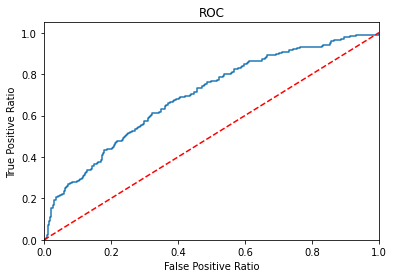

In [126]:
logit_roc_auc = roc_auc_score(Y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(Y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC')
plt.show()

----

##### ***KNeighbors***

In [132]:
# Model
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train , y_train)

In [140]:
# Predict 
test_pred_knn = knn_model.predict(x_test)
print(classification_report(y_test,test_pred_knn))
accuracy_score_knn = accuracy_score(y_test , test_pred_knn)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       284
           1       0.44      0.39      0.41        36

    accuracy                           0.88       320
   macro avg       0.68      0.66      0.67       320
weighted avg       0.87      0.88      0.87       320



*We found accuracy score : 0.88* 

---

##### ***XGBoost***

*İf you have never used XGBoost.You have to install it.*
* *pip install xgboost*

In [134]:
# Model
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train , y_train)

[11:27:49] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [139]:
# Predict 
test_pred_xgb = xgb_model.predict(x_test)
print(classification_report(y_test,test_pred_xgb))
accuracy_score_xgb = accuracy_score(y_test , test_pred_xgb)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       284
           1       0.54      0.56      0.55        36

    accuracy                           0.90       320
   macro avg       0.74      0.75      0.74       320
weighted avg       0.90      0.90      0.90       320



*We found accuracy score : 0.88* 

----

##### ***SVM(Support Vector Machines)***

In [138]:
# Model
svm = SVC(kernel='rbf')
svm_model = svm.fit(x_train , y_train)

# Predict
test_pred_svm = svm_model.predict(x_test)
print(classification_report(y_test , test_pred_svm))
accuracy_score_svm = accuracy_score(y_test , test_pred_svm)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       284
           1       0.52      0.31      0.39        36

    accuracy                           0.89       320
   macro avg       0.72      0.64      0.66       320
weighted avg       0.87      0.89      0.88       320



*We found accuracy score : 0.88*

***

In [146]:
# Model Results
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','XGBoost'],
    'Score': [accuracy_score_svm, accuracy_score_knn, accuracy_score_loj, 
              accuracy_score_rfc ,accuracy_score_xgb]})
models.sort_values(by='Score', ascending=False )

,Model,Score
3,Random Forest,0.900000
4,XGBoost,0.896875
0,Support Vector Machines,0.890625
1,KNN,0.875000
2,Logistic Regression,0.862500
